In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import utm

In [2]:
train_df = pd.read_csv('trainingData.csv')

In [3]:
train_df.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


In [4]:
train_df.shape

(19937, 529)

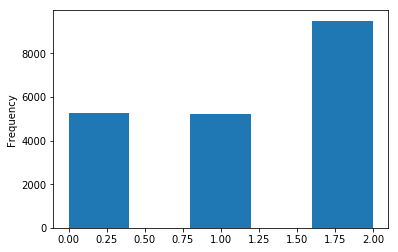

In [5]:
train_df['BUILDINGID'].plot.hist(bins=5)

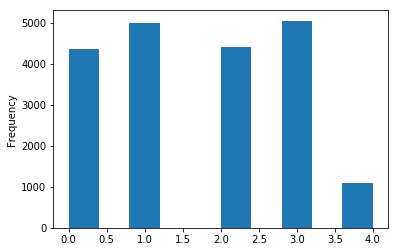

In [6]:
train_df['FLOOR'].plot.hist()

In [7]:
train_df.columns

Index(['WAP001', 'WAP002', 'WAP003', 'WAP004', 'WAP005', 'WAP006', 'WAP007',
       'WAP008', 'WAP009', 'WAP010',
       ...
       'WAP520', 'LONGITUDE', 'LATITUDE', 'FLOOR', 'BUILDINGID', 'SPACEID',
       'RELATIVEPOSITION', 'USERID', 'PHONEID', 'TIMESTAMP'],
      dtype='object', length=529)

In [8]:
len(train_df['SPACEID'].unique())

123

In [9]:
train_df['SPACEID'].unique()

array([106, 103, 102, 122, 105, 101, 112, 104, 110, 108, 109, 111, 107,
        15,  29, 117,  16,  28,  22,  10,   2,   4,   3,   5,   6,   9,
        27,   8,   7,  26,  18, 216,  17, 217, 247, 248, 246, 245, 244,
       243, 242, 241, 240, 201, 202, 204, 203, 205, 207, 206, 209, 211,
       208, 210, 212, 214, 213, 215, 121, 219, 221, 222, 218, 220, 250,
       223, 225, 224, 229, 226, 227, 228, 233, 231, 230, 232, 236, 235,
       234, 237, 238, 239, 141, 140, 143, 113, 114, 116, 115, 120, 118,
       128, 119, 129, 125, 124, 131, 127, 132, 126, 133, 134, 137, 135,
       136, 253, 254, 123, 130, 138, 139, 142, 146, 147, 249, 144,   1,
        30,  25,  13,  12,  11,  14], dtype=int64)

In [10]:
train_df.tail(20)

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
19917,100,100,100,100,100,100,100,100,100,100,...,100,-7375.148100,4.864774e+06,1,2,209,2,18,10,1371710012
19918,100,100,100,100,100,100,100,100,100,100,...,100,-7384.873200,4.864781e+06,1,2,204,2,18,10,1371709984
19919,100,100,100,100,100,100,100,100,100,100,...,100,-7395.213200,4.864786e+06,1,2,203,2,18,10,1371709959
19920,100,100,100,100,100,100,100,100,100,100,...,100,-7352.940800,4.864763e+06,1,2,223,2,18,10,1371710100
19921,100,100,100,100,100,100,100,100,100,100,...,100,-7336.944300,4.864764e+06,1,2,218,2,18,10,1371710190
19922,100,100,100,100,100,100,100,100,100,100,...,100,-7340.191400,4.864758e+06,1,2,216,2,18,10,1371710165
19923,100,100,100,100,100,100,100,100,100,100,...,100,-7349.475600,4.864761e+06,1,2,221,2,18,10,1371710130
19924,100,100,100,100,100,100,100,100,100,100,...,100,-7363.159000,4.864768e+06,1,2,224,2,18,10,1371710068
19925,100,100,100,100,100,100,100,100,100,100,...,100,-7327.479452,4.864767e+06,1,2,206,1,18,10,1371710255
19926,100,100,100,100,100,100,100,100,100,100,...,100,-7331.496600,4.864768e+06,1,2,206,2,18,10,1371710239


## Create a random sample of 30% of the dataset

In [11]:
smpl_train = train_df.sample(frac=0.3) #Pick a reasonable random sample of 'n' observations

In [12]:
smpl_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5981 entries, 10976 to 5307
Columns: 529 entries, WAP001 to TIMESTAMP
dtypes: float64(2), int64(527)
memory usage: 24.2 MB


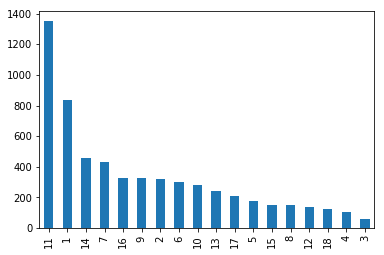

In [13]:
smpl_train['USERID'].value_counts().plot(kind='bar')

In [14]:
len(smpl_train['SPACEID'].unique())

123

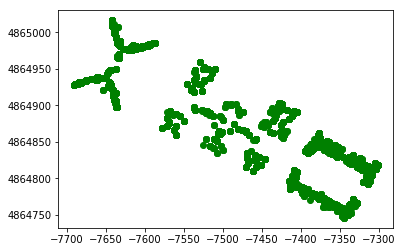

In [15]:
#Plot longitude against latitude
plt.plot(smpl_train['LONGITUDE'],smpl_train['LATITUDE'], 'go') 

In [16]:
small = smpl_train[['PHONEID','USERID']]

In [17]:
small.head()

,PHONEID,USERID
10976,13,11
9698,13,11
14408,7,14
8723,13,11
8494,13,11


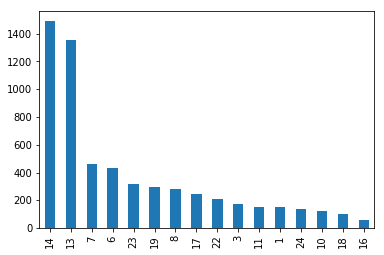

In [18]:
smpl_train['PHONEID'].value_counts().plot(kind='bar')

In [19]:
smpl_train['LONGITUDE']

10976   -7536.435900
9698    -7545.474833
14408   -7345.423300
8723    -7370.010600
8494    -7653.343301
18066   -7662.008200
6672    -7417.468600
3960    -7468.870245
4779    -7311.829500
15406   -7460.767900
19919   -7395.213200
15184   -7447.440600
3828    -7441.934193
6124    -7422.316300
75      -7397.859800
4052    -7312.662200
18373   -7684.298100
15178   -7441.934193
15977   -7596.648700
15498   -7423.060900
5066    -7411.353136
15426   -7338.858000
3223    -7315.743400
15493   -7425.661100
880     -7541.264300
372     -7480.431492
5775    -7458.264200
17668   -7685.723500
13948   -7536.565800
13637   -7549.379435
            ...     
13615   -7571.093200
12358   -7527.402600
7907    -7560.377608
7561    -7345.423300
8040    -7676.627100
16975   -7637.002300
14407   -7345.423300
7336    -7640.289600
7406    -7370.010600
11856   -7331.496600
11151   -7330.786900
13426   -7337.716100
18310   -7643.428200
14428   -7559.442700
18665   -7321.846261
15872   -7691.338400
14427   -7527

In [20]:
import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np

x, y, z = smpl_train['LONGITUDE'], smpl_train['LATITUDE'], smpl_train['FLOOR'] 
c = smpl_train['USERID']
#x, y, z = np.random.multivariate_normal(np.array([0,0,0]), np.eye(3), 400).transpose()

trace1 = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=2,
        color=c,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='3d-scatter-colorscale')

C:\Users\Tobi\Anaconda2\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [21]:
smpl_train['WAP002'].sum()

597538

### Sum all the WAP columns to find columns with no signal (i.e. 100)

In [22]:
train_results = np.sum(train_df, axis=0)

In [23]:
train_results.iloc[2] #1,993,700.00

1993700.0

### Remove all columns with no signal

In [24]:
train_df2 = train_df[train_df.columns[train_df.sum() !=1993700]]

In [25]:
train_df2.head()

,WAP001,WAP002,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,...,WAP519,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,-97,100,100,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


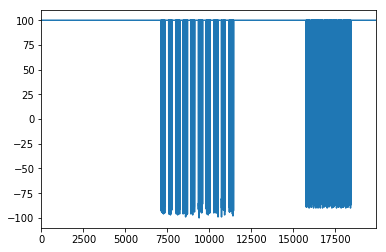

In [26]:
train_df2['WAP452'].plot()

### Slicing and Pandas manipulation

In [27]:
index = train_df2.index
columns = train_df2.columns
values = train_df2.values

In [28]:
values

array([[1.00000000e+02, 1.00000000e+02, 1.00000000e+02, ...,
        2.00000000e+00, 2.30000000e+01, 1.37171373e+09],
       [1.00000000e+02, 1.00000000e+02, 1.00000000e+02, ...,
        2.00000000e+00, 2.30000000e+01, 1.37171369e+09],
       [1.00000000e+02, 1.00000000e+02, 1.00000000e+02, ...,
        2.00000000e+00, 2.30000000e+01, 1.37171410e+09],
       ...,
       [1.00000000e+02, 1.00000000e+02, 1.00000000e+02, ...,
        1.80000000e+01, 1.00000000e+01, 1.37171092e+09],
       [1.00000000e+02, 1.00000000e+02, 1.00000000e+02, ...,
        1.80000000e+01, 1.00000000e+01, 1.37171105e+09],
       [1.00000000e+02, 1.00000000e+02, 1.00000000e+02, ...,
        1.80000000e+01, 1.00000000e+01, 1.37171102e+09]])

### Replace 100 (no signal) with -105 so data can be within range

In [29]:
#Replace 100(no signal) with -105 so data can be within range 
train_df2.replace(100, -105, inplace=True)

C:\Users\Tobi\Anaconda2\lib\site-packages\pandas\core\frame.py:4042: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



## Remove users with strange recordings

In [30]:
#train_df2.drop(train_df2.loc[train_df2.USERID == 7].index, inplace=True)
#train_df2.drop(train_df2.loc[train_df2.USERID == 11].index, inplace=True)
#train_df2.drop(train_df2.loc[train_df2.USERID == 16].index, inplace=True)


In [31]:
print ('train:', train_df2.shape)
train_df2.head()

train: (19937, 474)


,WAP001,WAP002,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,...,WAP519,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,-105,-105,-105,-105,-105,-97,-105,-105,-105,-105,...,-105,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


## Apply absolute() to Longitude column

In [32]:
train_df2['LONGITUDE']=abs(train_df2['LONGITUDE'])

C:\Users\Tobi\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



### Slice Columns! 

In [33]:
#Store all the WAPs in a vairable 
WAPs = train_df2.loc[:,'WAP001':'WAP519']

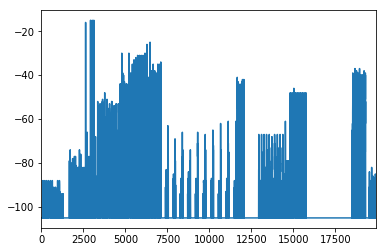

In [34]:
train_df2['WAP501'].plot()

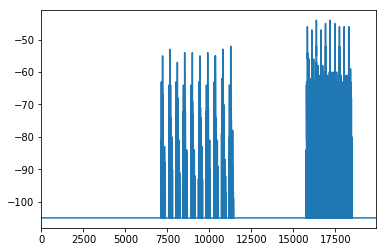

In [35]:
train_df2['WAP224'].plot()

In [36]:
train_df2.head()

,WAP001,WAP002,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,...,WAP519,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,-105,-105,-105,-105,-105,-97,-105,-105,-105,-105,...,-105,7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


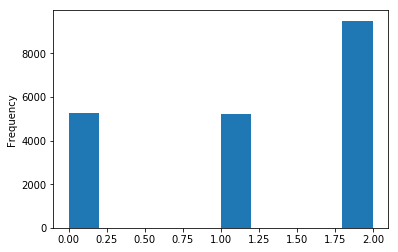

In [37]:
train_df2['BUILDINGID'].plot(kind='hist')

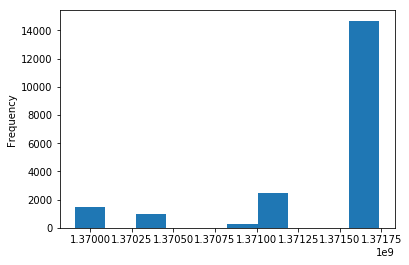

In [38]:
train_df2['TIMESTAMP'].plot(kind='hist')

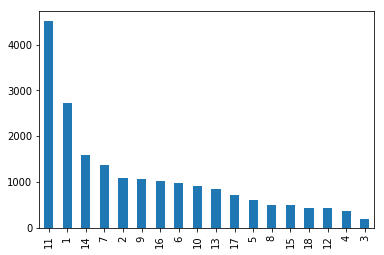

In [39]:
train_df2['USERID'].value_counts().plot(kind='bar')

### Remove unnecessary columns

In [40]:
train_df2.drop(['TIMESTAMP','PHONEID','USERID'], inplace=True, axis=1)

C:\Users\Tobi\Anaconda2\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [41]:
train_df2.head()

,WAP001,WAP002,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,...,WAP516,WAP517,WAP518,WAP519,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION
0,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-105,-105,-105,7541.2643,4.864921e+06,2,1,106,2
1,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-105,-105,-105,7536.6212,4.864934e+06,2,1,106,2
2,-105,-105,-105,-105,-105,-97,-105,-105,-105,-105,...,-105,-105,-105,-105,7519.1524,4.864950e+06,2,1,103,2
3,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-105,-105,-105,7524.5704,4.864934e+06,2,1,102,2
4,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-105,-105,-105,7632.1436,4.864982e+06,0,0,122,2


In [42]:
train_df2.describe()


,WAP001,WAP002,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,...,WAP516,WAP517,WAP518,WAP519,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION
count,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,...,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,1.993700e+04,19937.000000,19937.000000,19937.000000,19937.000000
mean,-104.991273,-104.983699,-104.974971,-104.702563,-104.323118,-104.218589,-104.188042,-104.941666,-100.460651,-100.428450,...,-100.056428,-98.397301,-104.985153,-104.998646,7464.275947,4.864871e+06,1.674575,1.212820,148.429954,1.833024
std,0.292228,0.531403,0.566261,2.590441,4.377768,4.533137,4.955450,0.915116,12.024715,12.070195,...,12.978733,13.448082,0.462780,0.111750,123.402010,6.693318e+01,1.223078,0.833139,58.342106,0.372964
min,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,...,-105.000000,-105.000000,-105.000000,-105.000000,7300.818990,4.864746e+06,0.000000,0.000000,1.000000,1.000000
25%,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,...,-105.000000,-105.000000,-105.000000,-105.000000,7359.193000,4.864821e+06,1.000000,0.000000,110.000000,2.000000
50%,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,...,-105.000000,-105.000000,-105.000000,-105.000000,7423.060900,4.864852e+06,2.000000,1.000000,129.000000,2.000000
75%,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,...,-105.000000,-105.000000,-105.000000,-105.000000,7594.737000,4.864930e+06,3.000000,2.000000,207.000000,2.000000
max,-93.000000,-86.000000,-89.000000,-58.000000,-47.000000,-61.000000,-50.000000,-84.000000,-3.000000,0.000000,...,0.000000,0.000000,-87.000000,-94.000000,7691.338400,4.865017e+06,4.000000,2.000000,254.000000,2.000000


### Create a new label for each building

In [43]:
my_list = []
for i, rows in train_df2.iterrows():
        if rows['BUILDINGID']==0.0:
            my_list.append("A")
        elif rows['BUILDINGID']==1.0:
            my_list.append("B")
        elif rows['BUILDINGID']==2.0:
            my_list.append("C")
        elif rows['BUILDINGID']==3.0:
            my_list.append("D")


In [44]:
building_label = pd.DataFrame(my_list)

In [45]:
train_df2['building_label']=building_label

C:\Users\Tobi\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [46]:
train_df2.head()

,WAP001,WAP002,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,...,WAP517,WAP518,WAP519,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,building_label
0,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-105,-105,7541.2643,4.864921e+06,2,1,106,2,B
1,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-105,-105,7536.6212,4.864934e+06,2,1,106,2,B
2,-105,-105,-105,-105,-105,-97,-105,-105,-105,-105,...,-105,-105,-105,7519.1524,4.864950e+06,2,1,103,2,B
3,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-105,-105,7524.5704,4.864934e+06,2,1,102,2,B
4,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-105,-105,7632.1436,4.864982e+06,0,0,122,2,A


In [47]:
type(train_df2['BUILDINGID'][1])

numpy.int64

### Create labels for a combination of building and floor to give new variable of a user's exact location

In [48]:
my_location = []
for i, rows in train_df2.iterrows():
    my_location.append(rows['building_label']+str(rows['FLOOR']))


In [49]:
person_location = pd.DataFrame(my_location) 

In [50]:
train_df2['person_location']=person_location

C:\Users\Tobi\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [51]:
train_df2.head()

,WAP001,WAP002,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,...,WAP518,WAP519,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,building_label,person_location
0,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-105,7541.2643,4.864921e+06,2,1,106,2,B,B2
1,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-105,7536.6212,4.864934e+06,2,1,106,2,B,B2
2,-105,-105,-105,-105,-105,-97,-105,-105,-105,-105,...,-105,-105,7519.1524,4.864950e+06,2,1,103,2,B,B2
3,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-105,7524.5704,4.864934e+06,2,1,102,2,B,B2
4,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-105,7632.1436,4.864982e+06,0,0,122,2,A,A0


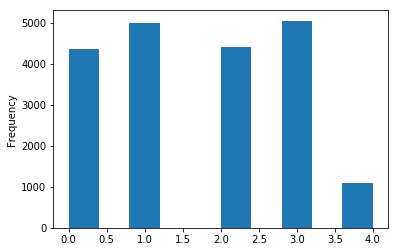

In [52]:
train_df2['FLOOR'].plot(kind='hist')

### Convert "person_location" column to category so Python treats it appropriately

In [53]:
train_df2['person_location']=train_df2['person_location'].astype('category')

C:\Users\Tobi\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [54]:
train_df2.head()

,WAP001,WAP002,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,...,WAP518,WAP519,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,building_label,person_location
0,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-105,7541.2643,4.864921e+06,2,1,106,2,B,B2
1,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-105,7536.6212,4.864934e+06,2,1,106,2,B,B2
2,-105,-105,-105,-105,-105,-97,-105,-105,-105,-105,...,-105,-105,7519.1524,4.864950e+06,2,1,103,2,B,B2
3,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-105,7524.5704,4.864934e+06,2,1,102,2,B,B2
4,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-105,7632.1436,4.864982e+06,0,0,122,2,A,A0


## Drop 'building' column
This was only created to produce 'person_location' feature

In [55]:
train_df2.drop(columns=['building_label'])

,WAP001,WAP002,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,...,WAP517,WAP518,WAP519,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,person_location
0,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-105,-105,7541.264300,4.864921e+06,2,1,106,2,B2
1,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-105,-105,7536.621200,4.864934e+06,2,1,106,2,B2
2,-105,-105,-105,-105,-105,-97,-105,-105,-105,-105,...,-105,-105,-105,7519.152400,4.864950e+06,2,1,103,2,B2
3,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-105,-105,7524.570400,4.864934e+06,2,1,102,2,B2
4,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-105,-105,7632.143600,4.864982e+06,0,0,122,2,A0
5,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-105,-105,7533.896200,4.864939e+06,2,1,105,2,B2
6,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-105,-105,7519.152400,4.864950e+06,2,1,103,2,B2
7,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-105,-105,7527.451100,4.864929e+06,2,1,101,2,B2
8,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-105,-105,7559.497300,4.864888e+06,2,1,112,2,B2
9,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-105,-105,7510.437173,4.864949e+06,2,1,103,1,B2


In [56]:
#Select only columns
train_df2.iloc[:,:-8]

,WAP001,WAP002,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,...,WAP510,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519
0,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105
1,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105
2,-105,-105,-105,-105,-105,-97,-105,-105,-105,-105,...,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105
3,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105
4,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105
5,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105
6,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105
7,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105
8,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105
9,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105


## Change person_location to category

In [57]:
train_df2['person_location'].astype('category')

0        B2
1        B2
2        B2
3        B2
4        A0
5        B2
6        B2
7        B2
8        B2
9        B2
10       B2
11       B2
12       B2
13       B2
14       B2
15       B2
16       B2
17       B2
18       B2
19       B2
20       B2
21       B2
22       B2
23       B2
24       B2
25       B2
26       B2
27       B2
28       B2
29       B2
         ..
19907    B3
19908    B3
19909    B3
19910    C1
19911    C1
19912    C1
19913    C1
19914    C1
19915    C1
19916    C1
19917    C1
19918    C1
19919    C1
19920    C1
19921    C1
19922    C1
19923    C1
19924    C1
19925    C1
19926    C1
19927    C1
19928    C1
19929    B3
19930    B3
19931    C1
19932    B3
19933    C1
19934    B3
19935    B3
19936    B3
Name: person_location, Length: 19937, dtype: category
Categories (13, object): [A0, A1, A2, A3, ..., C1, C2, C3, C4]

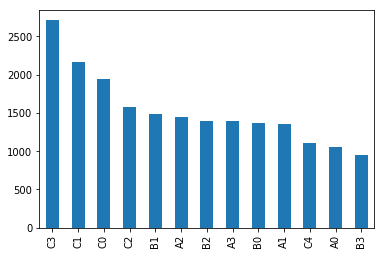

In [58]:
train_df2['person_location'].value_counts().plot(kind='bar')

In [59]:
#train_var_df = pd.DataFrame(train_var)

In [60]:
#train_var_df.reset_index()

In [61]:
#train_var_df.columns = ['variance']

In [62]:
#train_var_df.sort_values(by='variance', ascending=1)

In [63]:
train_one = WAPs

In [64]:
train_one.head()

,WAP001,WAP002,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,...,WAP510,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519
0,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105
1,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105
2,-105,-105,-105,-105,-105,-97,-105,-105,-105,-105,...,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105
3,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105
4,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,...,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105


In [65]:
train_one.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Columns: 465 entries, WAP001 to WAP519
dtypes: int64(465)
memory usage: 70.7 MB


In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X = train_one
y = train_df2['LONGITUDE']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [69]:
y_train.head()

5426     7359.297900
6234     7417.558400
15406    7460.767900
14833    7480.428211
6659     7311.829500
Name: LONGITUDE, dtype: float64

## Linear Regression for Predicting Latitude

In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
lm = LinearRegression()

In [72]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [73]:
print(lm.intercept_)

13573.668120645365


In [74]:
print(lm.coef_)

[ 1.43987230e+00  7.24234438e-01  1.62006104e-01 -9.69411465e-02
  5.28709380e-01  5.76901931e-01  5.27975461e-01  7.61607644e-01
 -2.77298652e-01 -8.52506236e-02  8.60563482e-03 -9.35362736e-02
 -2.45397786e-02  9.30457870e-01  9.54937777e-01  5.78787965e-01
  8.58106463e-01  4.59835035e-01  1.08167961e+00  1.22072671e+00
  7.20546787e-01  2.71720339e-02  3.35631842e-01  1.31118792e+00
  4.32775315e-01  1.98985970e-01  1.14820936e+00  3.80997394e-01
  8.19931671e-01  6.60606192e-01  1.08737155e+00  3.17295658e-01
  3.10416775e-01  5.60779728e-01 -9.64790344e-01  5.58089278e-01
  1.35561841e+00  3.73777236e-01  6.96637427e-02  2.51742580e-01
  8.41574086e-01  6.03723548e-01  1.51189177e+00  3.72869819e-01
  1.13836878e+00  1.71814937e+00  9.12398734e-01  7.25258942e-01
  4.10554091e-01  4.83095789e-01  1.23858509e+00  4.79586023e-01
  2.07878050e+00 -1.00057887e+00  9.00281051e-01  5.76841987e-01
 -5.55172217e-02  1.50400993e-01 -1.09118430e-01  5.32035576e-02
  4.85407958e-03  6.48937

In [75]:
X_train.columns

Index(['WAP001', 'WAP002', 'WAP005', 'WAP006', 'WAP007', 'WAP008', 'WAP009',
       'WAP010', 'WAP011', 'WAP012',
       ...
       'WAP510', 'WAP511', 'WAP512', 'WAP513', 'WAP514', 'WAP515', 'WAP516',
       'WAP517', 'WAP518', 'WAP519'],
      dtype='object', length=465)

In [76]:
predict_lm = lm.predict(X_test)

In [77]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [78]:
print('Mean Squared Error is: ',mean_squared_error(y_test,predict_lm))

Mean Squared Error is:  770.9789880470639


##### Calculate and Print RMSE

In [79]:
error = sqrt(mean_squared_error(y_test,predict_lm)) #Calculate RMSE
print('Root Mean Squared Error is: ',error)

Root Mean Squared Error is:  27.766508387751312


##### Calculate and Print R-Squared

In [80]:
print('R-Squared is: ',r2_score(y_test,predict_lm))

R-Squared is:  0.94943032115797


## Linear Regression for Predicting Longitude

In [81]:
X = train_one
y = train_df2['LONGITUDE']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [83]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [84]:
predict_lm_long= lm.predict(X_test)

In [85]:
error = sqrt(mean_squared_error(y_test,predict_lm)) #Calculate RMSE
print('Root Mean Squared Error is: ',error)

Root Mean Squared Error is:  173.8446552639948


In [86]:
print('R-Squared is: ',r2_score(y_test,predict_lm_long))

R-Squared is:  0.9501952056536878


## Random Forest Model for Predicting Building + Floor ID

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
rfc = RandomForestClassifier()

In [ ]:
prediction = rfc.predict(X_test)

In [ ]:
prediction

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
print(confusion_matrix(y_test, prediction))
print('\n')
print(classification_report(y_test,prediction))

## Logistic Regression for Predicting Building + Floor ID

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lrc = LogisticRegression()

In [ ]:
lrc.fit(X_train, y_train)

In [ ]:
predict_log = lrc.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, predict_log))
print('/n')
print(classification_report(y_test, predict_log))


## SVM  Model for Predicting Building + Floor ID

In [ ]:
import time

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC(gamma='scale', C=10)

In [ ]:
svc.fit(X_train,y_train)

In [ ]:
start_time = time.time()

predict_svc = svc.predict(X_test)

elapsed_time = time.time() - start_time
print(elapsed_time)

In [ ]:
print(confusion_matrix(y_test, predict_svc))
print('/n')
print(classification_report(y_test, predict_svc))

In [ ]:
validate = pd.read_csv('validationData.csv')

In [ ]:
my_list2 = []
for i, rows in validate.iterrows():
        if rows['BUILDINGID']==0.0:
            my_list2.append("A")
        elif rows['BUILDINGID']==1.0:
            my_list2.append("B")
        elif rows['BUILDINGID']==2.0:
            my_list2.append("C")
        elif rows['BUILDINGID']==3.0:
            my_list2.append("D")

In [ ]:
building_label2 = pd.DataFrame(my_list2)

In [ ]:
validate['building_label'] = building_label2

In [ ]:
validate.head()

In [ ]:
validate2 = validate[train_df.columns[train_df.sum() !=111100]]

In [ ]:
#Replace 100(no signal) with -105 so data can be within range 
validate.replace(100, -105, inplace=True)

In [ ]:
validate.head()

In [ ]:
WAP_validate = validate.iloc[:,:-10]

In [ ]:
my_location2 = []
for i, rows in validate.iterrows():
    my_location2.append(rows['building_label']+str(rows['FLOOR']))

In [ ]:
validate['person_location']= pd.DataFrame(my_location2)

In [ ]:
validate.head()

## Test PCA Preprocessing 

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
#Seperating out features
x = train_df2.iloc[:,:-8].values

In [ ]:
scaler.fit(x)

In [ ]:
scaled_data = scaler.transform(x)

In [ ]:
#Seperating out targets
y = train_df2.loc[:,:'person_location'].values

In [ ]:
scaled_data.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(.95)


In [ ]:
pca.fit(scaled_data)

In [ ]:
scaled_data.shape

In [ ]:
x_pca = pca.transform(scaled_data)

In [ ]:
x_pca.shape

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

## Run model on PCA transformed data

In [ ]:
rfc_pca = RandomForestClassifier()

In [ ]:
y_train.shape

In [ ]:
rfc_pca.fit(x_pca, y_train)

In [ ]:
pca_predict = rfc_pca.predict(X_test)

In [ ]:
pca_predict

In [ ]:
print(confusion_matrix(y_test, pca_predict))
print('\n')
print(classification_report(y_test,pca_predict))

In [ ]:
import seaborn as sns

In [ ]:
colz = train_df.columns

In [ ]:
finalDF = pd.concat([principalDf, train_df2[['person_location']]], axis=1)

## KNN Regression for predicting Latitude

In [90]:
X = train_one
y = train_df2['LATITUDE']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [91]:
#Preprocessing – Scaling the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(x_test_scaled)

C:\Users\Tobi\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by MinMaxScaler.

C:\Users\Tobi\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by MinMaxScaler.



In [92]:
from sklearn import neighbors

In [93]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 8.078798954436387
RMSE value for k=  2 is: 8.124878644886778
RMSE value for k=  3 is: 7.459751425441518
RMSE value for k=  4 is: 7.429164889506683
RMSE value for k=  5 is: 7.883691227114788
RMSE value for k=  6 is: 7.805173313914277
RMSE value for k=  7 is: 7.913783529043047
RMSE value for k=  8 is: 7.912746566357253
RMSE value for k=  9 is: 7.974063281582966
RMSE value for k=  10 is: 8.18369508818843
RMSE value for k=  11 is: 8.385447683256047
RMSE value for k=  12 is: 8.437278744702006
RMSE value for k=  13 is: 8.503756679396876
RMSE value for k=  14 is: 8.746250603481847
RMSE value for k=  15 is: 8.795873356288451
RMSE value for k=  16 is: 9.009803645734229
RMSE value for k=  17 is: 8.951941195363046
RMSE value for k=  18 is: 9.102825536993922
RMSE value for k=  19 is: 9.235673161938008
RMSE value for k=  20 is: 9.22488867349886


In [ ]:
model = neighbors.KNeighborsRegressor(n_neighbors = 5)
model.fit(X_train, y_train)  #fit the model
pred=model.predict(X_test) #make prediction on test set
error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse


In [ ]:
print(pred)

In [ ]:
print("RMSE: ",error)

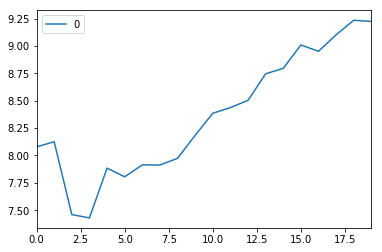

In [94]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [ ]:
from sklearn.metrics import cohen_kappa_score

In [ ]:
cohen_kappa_score(pred, y_test)

##### Run GridSearch to get the best value of K

In [ ]:
##from sklearn.model_selection import GridSearchCV
#params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

#knn = neighbors.KNeighborsRegressor()

#model = GridSearchCV(knn, params, cv=5)
#model.fit(X_train,y_train)
#model.best_params_

## KNN Regression for Predicting Longitude

In [ ]:
X = train_one
y = train_df2['LONGITUDE']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
model2 = neighbors.KNeighborsRegressor(n_neighbors = 5)
model2.fit(X_train, y_train)  #fit the model
pred2=model2.predict(X_test) #make prediction on test set
error = sqrt(mean_squared_error(y_test,pred2)) #calculate rmse
#rmse_val.append(error) #store rmse values
   


In [ ]:
print('RMSE value for k= ' , 5 , 'is:', error)

In [ ]:
print('R-Squared is: ',r2_score(y_test,pred2))

In [ ]:
pred

In [ ]:
plt.plot(pred2, pred, 'go')